In [1]:
%load_ext autoreload


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)



In [3]:
y_train = pd.read_parquet("../../dataset/A/train_targets.parquet")
X_train_observed = pd.read_parquet("../../dataset/A/X_train_observed.parquet")
X_train_estimated = pd.read_parquet("../../dataset/A/X_train_estimated.parquet")
X_test = pd.read_parquet("../../dataset/A/X_test_estimated.parquet")
print(f"Observed {X_train_observed.shape}")
print(f"Estimated {X_train_estimated.shape}")
print(f"y {y_train.shape}")
print(f"Test {X_train_observed.shape}")

Observed (118669, 46)
Estimated (17576, 47)
y (34085, 2)
Test (118669, 46)


There is an extra column in estimated 

In [4]:
set(X_train_estimated.columns) ^ set(X_train_observed.columns)

{'date_calc'}

In [5]:
X_train_observed.head(100)

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000e+00,0.000000,1744.900024,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.00,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.000000e+00,0.000000,1734.000000,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.00,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.000000,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.000000e+00,0.000000,1723.500000,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.00,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.000000,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.000000e+00,0.000000,1713.400024,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.00,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.000000,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000e+00,0.000000,1703.599976,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.00,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0
5,2019-06-02 23:15:00,7.7,1.224,1694.199951,0.000000e+00,0.000000,1694.199951,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.299988,0.00,0.0,992.799988,998.799988,0.0,0.0,68.400002,1004.799988,NaN,0.0,0.0,-0.0,0.2,0.235000,-4.438000,0.0,286.899994,100.000000,36427.199219,3.4,-3.4,0.2,-0.0
6,2019-06-02 23:30:00,7.7,1.223,1685.099976,0.000000e+00,0.000000,1685.099976,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.800003,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.099976,0.00,0.0,992.599976,998.500000,0.0,0.0,67.599998,1004.500000,NaN,0.0,0.0,-0.0,0.2,3.728000,-4.379000,0.0,286.899994,100.000000,31136.000000,3.3,-3.3,0.4,-0.0
7,2019-06-02 23:45:00,7.7,1.222,1676.400024,0.000000e+00,0.000000,1676.400024,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.900002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.900024,0.00,0.0,992.299988,998.299988,0.0,0.1,66.800003,1004.299988,NaN,0.0,0.0,-0.0,0.2,7.218000,-4.219000,0.0,287.000000,100.000000,25819.500000,3.2,-3.2,0.5,-0.0
8,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000e+00,0.000000,1668.099976,0.0,280.200012,0.000000,0.000000,0.000000,0.000000e+00,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.599976,0.00,0.0,992.099976,998.099976,0.0,0.1,66.000000,1004.099976,NaN,0.0,0.0,-0.0,0.2,9.741000,-3.910000,0.0,287.000000,100.000000,20473.000000,3.2,-3.1,0.7,-0.0
9,2019-06-03 00:15:00,7.8,1.220,1598.199951,0.000000e+00,0.000000,1598

In [6]:
X_train_estimated.head(10)

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.00,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.00,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.00,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.0,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.00,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.0,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.00,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.0,6254.399902,0.6,-0.1,0.6,-0.0
5,2022-10-27 07:00:18,2022-10-28 23:15:00,8.1,1.234,4046.199951,0.0,0.0,2242.300049,1.0,280.899994,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.599976,0.00,0.0,987.099976,993.099976,0.0,0.1,92.800003,999.200012,NaN,0.0,0.0,-0.0,0.7,4.391000,-39.549999,0.0,284.399994,100.0,5836.399902,0.7,0.2,0.7,-0.0
6,2022-10-27 07:00:18,2022-10-28 23:30:00,8.1,1.234,4024.199951,0.0,0.0,1877.500000,1.0,280.799988,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.400024,0.00,0.0,986.900024,992.900024,0.0,0.1,93.099998,999.000000,NaN,0.0,0.0,-0.0,0.7,9.129000,-39.352001,0.0,284.200012,100.0,5415.200195,0.8,0.7,0.5,-0.0
7,2022-10-27 07:00:18,2022-10-28 23:45:00,8.0,1.235,4002.199951,0.0,0.0,1512.699951,1.0,280.600006,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.299988,0.00,0.0,986.700012,992.700012,0.0,0.1,93.300003,998.799988,NaN,0.0,0.0,-0.0,0.8,13.835000,-39.018002,0.0,284.100006,100.0,4990.700195,1.0,0.9,0.3,-0.0
8,2022-10-28 07:00:05,2022-10-29 00:00:00,8.2,1.230,1978.000000,0.0,0.0,1660.500000,1.0,281.000000,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,997.200012,0.08,1.0,984.700012,990.700012,0.0,0.2,89.199997,996.700012,NaN,0.0,0.0,-0.0,1.4,17.361000,-39.013000,0.1,283.700012,100.0,3041.600098,1.5,1.2,0.8,-0.0
9,2022-10-28 07:00:05,2022-10-29 00:15:00,8.2,1.230,1914.000000,0.0,0.0,1670.199951,1.0,280.899994,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,997.099976,0.13,1.0,984.500000,990.500000,0.0,0.2,89.199997,996.599976,NaN,0.0,0.0,-0.0,1.2,21.995001,-38.446999,0.2,283.799988,100.0,3174.000000,1.5,1.1,0.9,-0.0


We shouldn't need date calc at all

In [7]:
X_train_estimated.drop(["date_calc"], axis=1, inplace=True)
X_train_estimated.shape

(17576, 46)

In [8]:
y_train.head(100)


,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
5,2019-06-03 03:00:00,251.02
6,2019-06-03 04:00:00,263.78
7,2019-06-03 05:00:00,522.72
8,2019-06-03 06:00:00,904.42
9,2019-06-03 07:00:00,1238.82


In [9]:
print(y_train.shape[0] * 4)
print(X_train_observed.shape[0] + X_train_estimated.shape[0])
print(y_train.iloc[0,0], y_train.iloc[-1,0])
print(X_train_observed.iloc[0,0], X_train_observed.iloc[-1,0])
print(X_train_estimated.iloc[0,0], X_train_estimated.iloc[-1,0])
print(X_test.iloc[0,0], X_test.iloc[-1,0])


136340
136245
2019-06-02 22:00:00 2023-04-30 23:00:00
2019-06-02 22:00:00 2022-10-21 01:00:00
2022-10-28 22:00:00 2023-04-30 23:45:00
2023-04-30 07:00:04 2023-07-02 07:00:31


The dimensions of X and y does not match.
We have the weather for every 15 minutes, but doing hourly predictions -> we need to deal with that
For now just repeat the lines of y and then we can average the output
Also there are some missing times in X or Y -> lets delete them, but do not forget, that thy are missing if we need to use the time data

In [10]:
# y_train = y_train.loc[y_train.index.repeat(4)]
# print(y_train.shape)
# for i in range(int(y_train.shape[0] / 4)):
#     y_train.iloc[4*i+1, 0] += pd.Timedelta("15 min")
#     y_train.iloc[4*i+2, 0] += pd.Timedelta("30 min")
#     y_train.iloc[4*i+3, 0] += pd.Timedelta("45 min")

y_train = y_train.loc[y_train.index.repeat(4)].reset_index(drop=True)
y_train['time'] += y_train.groupby(y_train.index // 4).cumcount() * pd.Timedelta("15 min")



In [11]:
y_train = y_train[y_train['time'].isin(X_train_observed['date_forecast']) | y_train['time'].isin(X_train_estimated['date_forecast'])].reset_index(drop=True)      
X_train_observed = X_train_observed[X_train_observed['date_forecast'].isin(y_train['time'])].reset_index(drop=True)
X_train_estimated = X_train_estimated[X_train_estimated['date_forecast'].isin(y_train['time'])].reset_index(drop=True)



In [12]:

print(y_train.shape[0])
print(X_train_observed.shape[0] + X_train_estimated.shape[0])
print(y_train.iloc[0,0], y_train.iloc[-1,0])
print(X_train_observed.iloc[0,0], X_train_observed.iloc[-1,0])
print(X_train_estimated.iloc[0,0], X_train_estimated.iloc[-1,0])

136244
136244
2019-06-02 22:00:00 2023-04-30 23:45:00
2019-06-02 22:00:00 2022-10-21 00:45:00
2022-10-28 22:00:00 2023-04-30 23:45:00


In [13]:
print(X_train_observed[~ X_train_observed['date_forecast'].isin(y_train['time'])])

Empty DataFrame
Columns: [date_forecast, absolute_humidity_2m:gm3, air_density_2m:kgm3, ceiling_height_agl:m, clear_sky_energy_1h:J, clear_sky_rad:W, cloud_base_agl:m, dew_or_rime:idx, dew_point_2m:K, diffuse_rad:W, diffuse_rad_1h:J, direct_rad:W, direct_rad_1h:J, effective_cloud_cover:p, elevation:m, fresh_snow_12h:cm, fresh_snow_1h:cm, fresh_snow_24h:cm, fresh_snow_3h:cm, fresh_snow_6h:cm, is_day:idx, is_in_shadow:idx, msl_pressure:hPa, precip_5min:mm, precip_type_5min:idx, pressure_100m:hPa, pressure_50m:hPa, prob_rime:p, rain_water:kgm2, relative_humidity_1000hPa:p, sfc_pressure:hPa, snow_density:kgm3, snow_depth:cm, snow_drift:idx, snow_melt_10min:mm, snow_water:kgm2, sun_azimuth:d, sun_elevation:d, super_cooled_liquid_water:kgm2, t_1000hPa:K, total_cloud_cover:p, visibility:m, wind_speed_10m:ms, wind_speed_u_10m:ms, wind_speed_v_10m:ms, wind_speed_w_1000hPa:ms]
Index: []


In [14]:
set(X_train_observed.columns[X_train_observed.isna().any()]) & set(X_train_estimated.columns[X_train_estimated.isna().any()].tolist())



{'ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'}

These tree columns contains Nans, need make them numbers or remove them

We can put snow density to 0, if there is now snow

In [15]:
X_train_observed['snow_density:kgm3'] = X_train_observed['snow_density:kgm3'].fillna(0)
X_train_estimated['snow_density:kgm3'] = X_train_estimated['snow_density:kgm3'].fillna(0)



In [16]:
X_train_observed[X_train_observed['ceiling_height_agl:m'].isna()].head(10)


,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
212,2019-06-05 03:00:00,8.7,1.241,NaN,1.089928e+05,56.500000,NaN,0.0,281.899994,32.400002,73939.00000,29.000000,5.851990e+04,0.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1012.400024,0.0,0.0,999.599976,1005.700012,0.0,0.0,93.400002,1011.799988,0.0,0.0,0.0,-0.0,0.0,50.032001,6.227000,0.0,283.600006,0.000000,27563.599609,0.9,-0.9,0.1,-0.0
332,2019-06-06 09:00:00,10.4,1.198,NaN,2.485811e+06,734.500000,NaN,0.0,285.200012,99.400002,352506.40625,563.299988,1.882694e+06,0.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1014.799988,0.0,0.0,1001.900024,1007.799988,0.0,0.0,66.300003,1013.700012,0.0,0.0,0.0,-0.0,0.0,134.507996,43.237000,0.0,289.600006,0.000000,48871.101562,2.2,-1.0,-2.0,0.0
356,2019-06-06 15:00:00,11.2,1.167,NaN,2.327981e+06,592.900024,NaN,0.0,286.700012,100.099998,369640.90625,366.500000,1.545392e+06,29.500000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1009.500000,0.0,0.0,997.000000,1002.700012,0.0,0.0,43.500000,1008.500000,0.0,0.0,0.0,-0.0,0.0,249.253998,35.073002,0.1,298.399994,29.799999,52541.699219,4.0,-2.8,-2.9,0.0
536,2019-06-08 12:00:00,10.2,1.189,NaN,2.977528e+06,820.099976,NaN,0.0,285.000000,124.800003,573636.37500,604.000000,1.935501e+06,22.100000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1010.099976,0.0,0.0,997.299988,1003.200012,0.0,0.0,62.099998,1009.099976,0.0,0.0,0.0,-0.0,0.0,195.158997,48.728001,0.0,290.500000,40.299999,49041.300781,4.4,-3.2,-3.1,0.0
537,2019-06-08 12:15:00,10.4,1.189,NaN,2.966251e+06,812.400024,NaN,0.0,285.200012,123.099998,511009.40625,595.400024,2.051934e+06,21.299999,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1010.000000,0.0,0.0,997.200012,1003.000000,0.0,0.0,63.099998,1008.900024,0.0,0.0,0.0,-0.0,0.0,200.330994,48.215000,0.0,290.600006,38.599998,49057.500000,4.7,-3.2,-3.4,0.0
538,2019-06-08 12:30:00,10.6,1.188,NaN,2.946794e+06,802.500000,NaN,0.0,285.500000,121.099998,446952.40625,585.299988,2.162933e+06,20.600000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1009.900024,0.0,0.0,997.000000,1002.900024,0.0,0.0,64.099998,1008.799988,0.0,0.0,0.0,-0.0,0.0,205.408005,47.562000,0.0,290.700012,37.000000,49062.601562,4.9,-3.3,-3.6,0.0
539,2019-06-08 12:45:00,10.7,1.188,NaN,2.919246e+06,790.400024,NaN,0.0,285.700012,121.900002,446635.00000,569.500000,2.124914e+06,19.900000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1009.700012,0.0,0.0,996.900024,1002.799988,0.0,0.0,65.099998,1008.700012,0.0,0.0,0.0,-0.0,0.0,210.375000,46.775002,0.0,290.799988,35.299999,49056.699219,5.1,-3.3,-3.9,0.0
540,2019-06-08 13:00:00,10.9,1.187,NaN,2.883736e+06,776.200012,NaN,0.0,286.000000,122.400002,444953.09375,552.400024,2.081587e+06,19.100000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1009.599976,0.0,0.0,996.799988,1002.700012,0.0,0.0,66.199997,1008.599976,0.0,0.0,0.0,-0.0,0.0,215.218002,45.863998,0.0,290.899994,33.700001,49039.800781,5.3,-3.3,-4.2,0.0
541,2019-06-08 13:15:00,10.9,1.186,NaN,2.840428e+06,760.000000,NaN,0.0,286.000000,122.400002,441902.40625,534.099976,2.033214e+06,17.299999,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1009.400024,0.0,0.0,996.700012,1002.500000,0.0,0.0,64.900002,1008.400024,0.0,0.0,0.0,-0.0,0.0,219.931000,44.839001,0.0,291.200012,29.299999,48983.199219,5.3,-3.4,-4.1,0.0
542,2019-06-08 13:30:00,10.9,1.185,NaN,2.789524e+06,741.799988,NaN,0.0,285.899994,122.000000,437485.59375,514.79998

In [17]:
X_train_observed[X_train_observed['cloud_base_agl:m'].isna()].shape == X_train_observed[X_train_observed['ceiling_height_agl:m'].isna()].shape


False

<Axes: title={'center': 'ceiling_height_agl:m'}, xlabel='date_forecast'>

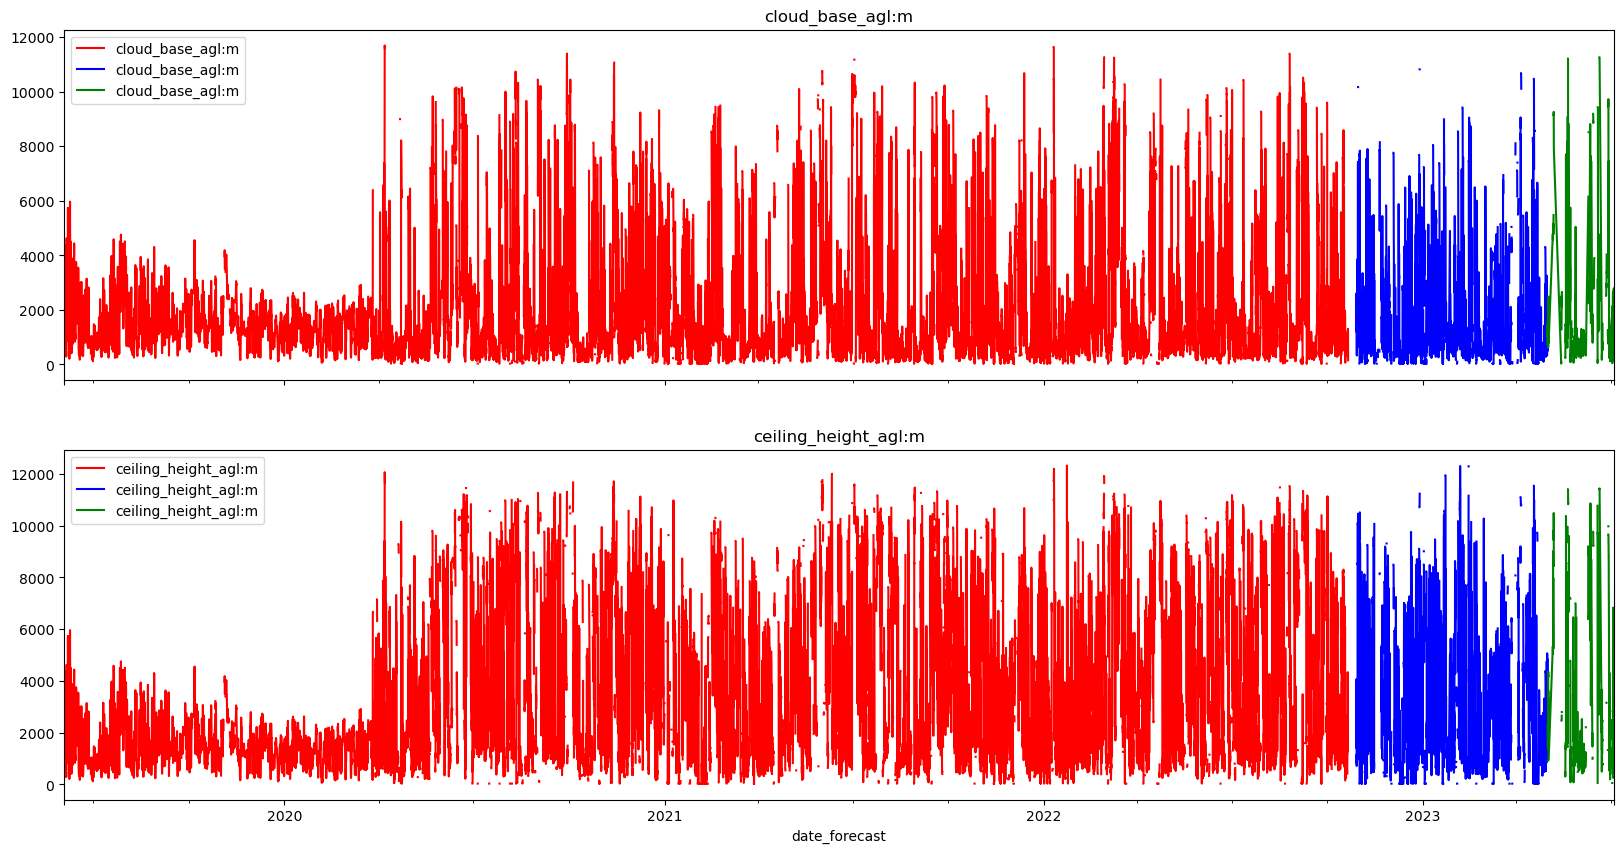

In [18]:
# Plotting a single feature
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
feature_name = 'cloud_base_agl:m'
X_train_observed[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title=feature_name, color='red')
X_train_estimated[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title=feature_name, color='blue')
X_test[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title=feature_name, color='green')

# Plotting a single feature
feature_name = 'ceiling_height_agl:m'
X_train_observed[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title=feature_name, color='red')
X_train_estimated[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title=feature_name, color='blue')
X_test[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title=feature_name, color='green')


Don't know, how to interpret this, we can use interpolate function

<Axes: title={'center': 'ceiling_height_agl:m'}, xlabel='date_forecast'>

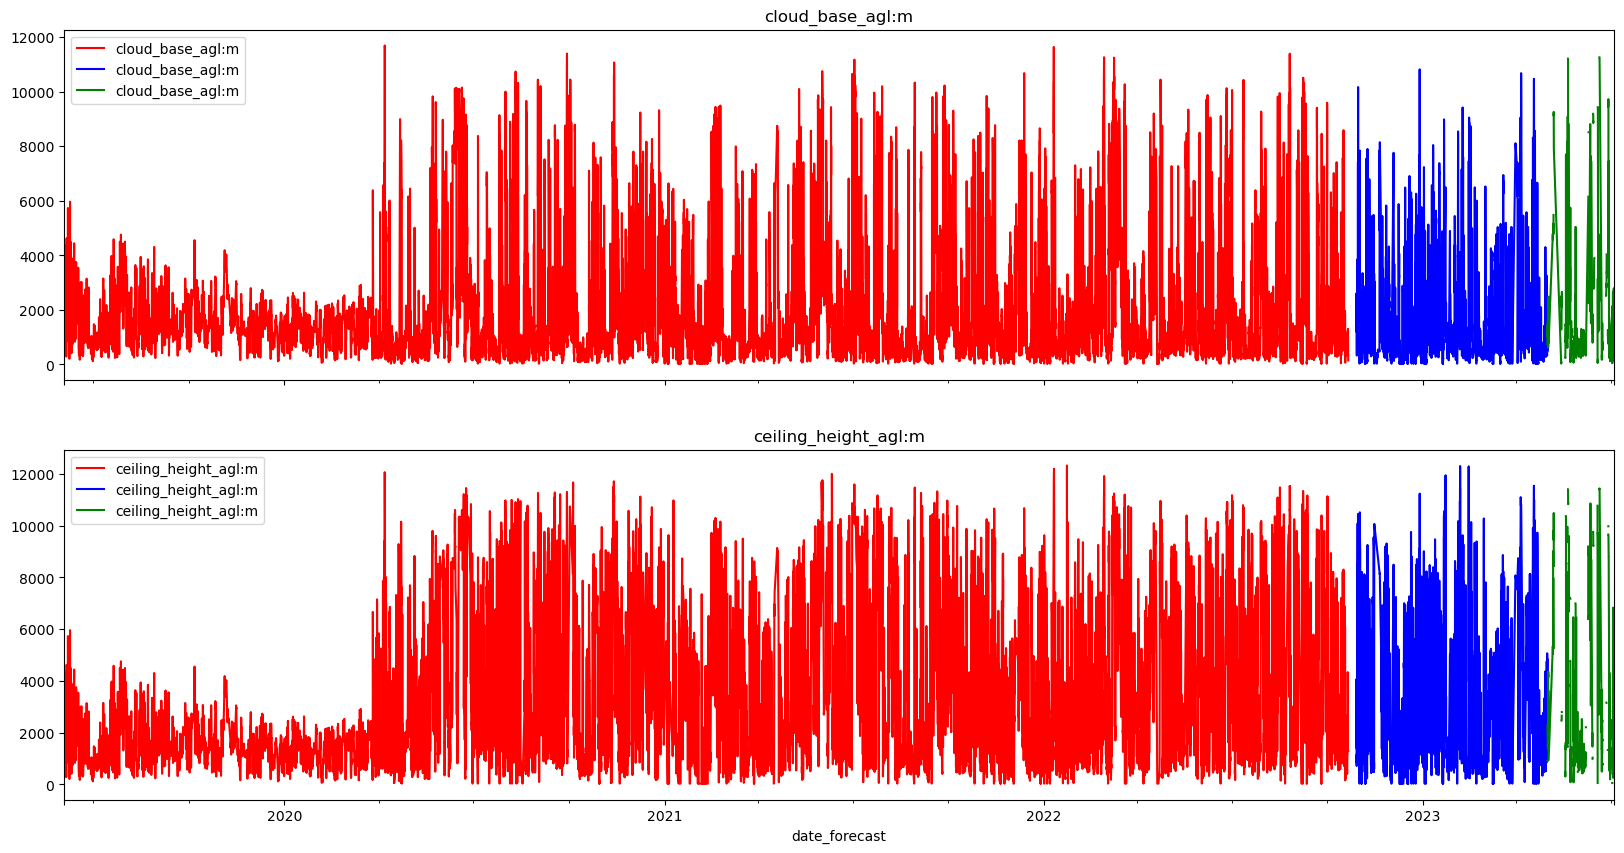

In [19]:
X_train_observed = X_train_observed.interpolate(axis=0)
X_train_estimated = X_train_estimated.interpolate(axis=0)
# Plotting a single feature
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
feature_name = 'cloud_base_agl:m'
X_train_observed[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title=feature_name, color='red')
X_train_estimated[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title=feature_name, color='blue')
X_test[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title=feature_name, color='green')

# Plotting a single feature
feature_name = 'ceiling_height_agl:m'
X_train_observed[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title=feature_name, color='red')
X_train_estimated[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title=feature_name, color='blue')
X_test[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title=feature_name, color='green')

Let's look to some information about the data

In [20]:
X_train_observed.describe()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,118668,118668.000000,118668.000000,118668.000000,1.186680e+05,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,1.186680e+05,118668.000000,1.186680e+05,118668.000000,118668.0,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.0,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000,118668.000000
mean,2021-02-09 23:22:30.000000512,6.652590,1.249064,3247.824951,5.994068e+05,166.501785,1885.553345,0.022399,276.823395,44.918659,1.617070e+05,56.612221,2.038042e+05,67.606071,6.0,0.053118,0.004418,0.106243,0.013277,0.026567,0.521396,0.511646,1009.632874,0.006302,0.091019,996.765381,1002.868164,0.187400,0.011914,74.231613,1008.998291,5.738699,0.052763,0.0,0.000062,0.091566,179.630707,1.529839,0.059088,280.708588,74.401695,32446.955078,3.043210,0.756796,0.517433,0.000019
min,2019-06-02 22:00:00,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,932.299988,938.099976,0.000000,0.000000,22.700001,943.900024,0.000000,0.000000,0.0,-0.000000,0.000000,0.002000,-50.004002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000
25%,2020-04-06 22:41:15,4.400000,1.224000,1177.275024,0.000000e+00,0.000000,610.900024,0.000000,272.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,43.299999,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.099976,0.000000,0.000000,989.299988,995.299988,0.000000,0.000000,65.000000,1001.400024,0.000000,0.000000,0.0,-0.000000,0.000000,88.488749,-15.063750,0.000000,275.899994,54.799999,15592.175293,1.700000,-1.400000,-0.700000,0.000000
50%,2021-02-09 23:22:30,6.300000,1.247000,2127.500000,3.574835e+04,8.600000,1226.332153,0.000000,277.200012,4.100000,2.481590e+04,0.000000,8.965000e+01,80.500000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1010.700012,0.000000,0.000000,997.900024,1003.900024,0.000000,0.000000,76.699997,1010.000000,0.000000,0.000000,0.0,0.000000,0.000000,179.437500,1.202000,0.000000,280.700012,93.699997,36359.701172,2.700000,0.400000,0.500000,-0.000000
75%,2021-12-16 00:03:45,8.600000,1.272000,4798.299805,1.037838e+06,288.799988,2251.000000,0.000000,282.000000,76.000000,2.743284e+05,41.799999,1.598418e+05,98.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.299988,0.000000,0.000000,1005.400024,1011.500000,0.000000,0.000000,85.400002,1017.599976,0.000000,0.000000,0.0,0.000000,0.100000,270.641243,18.995001,0.100000,285.200012,99.900002,48084.575195,4.100000,2.700000,1.700000,0.000000
max,2022-10-21 00:45:00,17.500000,1.427000,12328.500000,3.005720e+06,836.400024,11688.700195,1.000000,293.799988,345.700012,1.205498e+06,688.700012,2.451173e+06,100.000000,6.0,15.100000,3.900000,15.100000,7.900000,14.800000,1.000000,1.000

We can see, that snow_drift:idx are only 0. elevation:m is constant, we can remove that too, but we should add a way to distinguish the 3 buildings afterwards (brobably is_a, is_b and is_c columns) if we use all 3 to train 1 model 

In [21]:
X_train_estimated.drop(columns=["snow_drift:idx", "elevation:m"],  inplace=True)
X_train_observed.drop(columns=["snow_drift:idx", "elevation:m"], inplace=True)


Some of the features like (for example wind) should not be necessary and some could be duplicated - lets look at it
Let's print its correlation with the solution

In [22]:
display(pd.merge(y_train, X_train_observed.rename(columns={'date_forecast': 'time'}), how="inner", on='time').corr())
with open('correlation.html', 'w') as f: # make it nicer
    print(pd.merge(y_train, X_train_observed.rename(columns={'date_forecast': 'time'}), how="inner", on='time').corr().style.background_gradient()
.to_html(), file=f)


,time,pv_measurement,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
time,1.000000,0.023750,0.025112,0.028651,0.241210,0.019492,0.019403,0.078364,0.004579,0.024157,0.040530,0.041106,-0.004116,-0.004150,0.060254,0.004816,0.002605,0.006445,0.003241,0.003853,0.019741,-0.022063,0.105696,0.045796,0.159598,0.105865,0.105865,-0.011472,0.038484,0.000851,0.105857,0.006168,-0.007365,-0.037367,-0.000592,0.000829,0.030997,-0.011335,0.002629,0.054884,-0.041891,-0.007045,0.048784,-0.040544,-0.008624
pv_measurement,0.023750,1.000000,0.230557,-0.376005,0.201236,0.797501,0.810095,0.186471,-0.065421,0.245280,0.708439,0.701657,0.860284,0.847485,-0.215947,-0.048656,-0.032621,-0.063958,-0.040317,-0.046114,0.539194,-0.572735,0.180927,-0.061202,-0.090227,0.181160,0.176168,-0.041395,-0.083963,-0.404427,0.171167,-0.071867,-0.058203,-0.018087,-0.135769,-0.015468,0.694605,-0.128140,0.351599,-0.183096,0.258646,-0.081247,-0.065414,-0.278248,-0.005325
absolute_humidity_2m:gm3,0.025112,0.230557,1.000000,-0.804124,0.117993,0.352799,0.349925,0.020243,0.123429,0.974863,0.284845,0.291106,0.239286,0.243771,0.021246,-0.119009,-0.069180,-0.148715,-0.085106,-0.098864,0.304648,-0.322751,0.147834,0.067723,-0.025244,0.165349,0.154407,-0.055803,0.261639,0.160020,0.143462,-0.227574,-0.203686,-0.013563,0.034040,0.022868,0.432341,0.110362,0.900297,0.043028,-0.158685,-0.157922,0.050103,-0.258793,0.004869
air_density_2m:kgm3,0.028651,-0.376005,-0.804124,1.000000,-0.173320,-0.473963,-0.463352,-0.099914,-0.060455,-0.838734,-0.402075,-0.415492,-0.393767,-0.409483,-0.067082,0.063040,0.044147,0.075156,0.052816,0.058817,-0.386338,0.402329,0.280094,-0.084776,-0.012125,0.263751,0.275650,0.072124,-0.162898,0.141426,0.287480,0.332453,0.316893,0.013984,-0.065669,-0.067947,-0.504496,-0.063594,-0.915071,-0.103030,-0.011078,-0.017519,0.026203,0.142867,-0.000574
ceiling_height_agl:m,0.241210,0.201236,0.117993,-0.173320,1.000000,0.090234,0.084367,0.692072,0.030494,0.108247,0.061956,0.066469,0.277179,0.285477,-0.426620,-0.021225,-0.012180,-0.028200,-0.016353,-0.018584,0.068675,-0.072672,0.108150,-0.016438,-0.069754,0.112690,0.110015,0.017555,-0.159381,-0.416178,0.107339,-0.053579,-0.068347,-0.030074,-0.192262,0.043859,0.097826,-0.341298,0.272599,-0.237106,0.451311,-0.178920,-0.324658,-0.015078,-0.004065
clear_sky_energy_1h:J,0.019492,0.797501,0.352799,-0.473963,0.090234,1.000000,0.992332,0.055436,-0.080024,0.362015,0.911178,0.922412,0.719660,0.732282,0.002803,-0.056606,-0.037863,-0.072752,-0.046583,-0.052732,0.650793,-0.690136,0.157752,-0.008043,-0.032568,0.160361,0.154128,-0.050701,0.054176,-0.339911,0.147888,-0.090024,-0.074641,-0.020593,-0.039221,0.056781,0.847873,0.016901,0.438992,0.009879,0.092575,0.013020,0.069510,-0.343041,-0.005087
clear_sky_rad:W,0.019403,0.810095,0.349925,-0.463352,0.084367,0.992332,1.000000,0.052885,-0.079422,0.359137,0.917221,0.914733,0.727172,0.728481,0.003261,-0.055062,-0.037589,-0.072561,-0.045966,-0.051830,0.651261,-0.693265,0.158357,-0.009061,-0.032315,0.160652,0.154570,-0.050494,0.052231,-0.313414,0.148477,-0.089671,-0.074147,-0.020584,-0.041591,0.002414,0.851638,0.017785,0.424910,0.009635,0.083517,0.003148,0.063866,-0.327926,-0.006878
cloud_base_agl:m,0.078364,0.186471,0.020243,-0.099914,0.692072,0.055436,0.052885,1.000000,0.027069,0.013091,0.016350,

Also lets see, which features would linear regression model use, ass its easy to interpret

In [23]:
def compute_mne(pred, truth):
    pred[pred < 0] = 0
    mae_nn = np.mean(np.abs(np.array(truth) - pred))
    return mae_nn

In [24]:
X_train_observed
reg = LinearRegression().fit(X_train_observed.drop("date_forecast", axis=1), y_train[y_train['time'].isin(X_train_observed['date_forecast'])]['pv_measurement'].reset_index(drop=True))
reg.score(X_train_observed.drop("date_forecast", axis=1), y_train[y_train['time'].isin(X_train_observed['date_forecast'])]['pv_measurement'].reset_index(drop=True))

res = reg.predict(X_train_observed.drop("date_forecast", axis=1))
compute_mne(res, y_train[y_train['time'].isin(X_train_observed['date_forecast'])]['pv_measurement'].reset_index(drop=True))

258.950944102997

Try this regression use on test data for fun

In [25]:
X_test.drop(columns=['date_calc', 'snow_drift:idx', 'elevation:m'], inplace=True, errors='ignore')
X_test['snow_density:kgm3'] = X_test['snow_density:kgm3'].fillna(0)
X_test = X_test.interpolate(axis=0)
pred4 = reg.predict(X_test.drop("date_forecast", axis=1))

prediction = np.zeros(pred4.shape[0] // 4)

for i in range(prediction.shape[0]):
    prediction[i] = np.mean(pred4[4*i: 4*(i+1)])

prediction[prediction < 0.] = 0.
prediction = np.hstack([prediction, prediction, prediction])
df = pd.DataFrame({'prediction': prediction})
df.to_csv('easiest_regression.csv', index_label='id')
prediction.shape


(2160,)

In [26]:
coefs = reg.coef_
#coefs *= np.mean(X_train_observed.drop("date_forecast", axis=1), axis=0) 
for feature, coef in sorted(zip(reg.feature_names_in_, reg.coef_), key=lambda x:abs(x[1]), reverse=True):
    print(feature, coef)

precip_type_5min:idx -70.69606
absolute_humidity_2m:gm3 -63.23965
dew_point_2m:K 46.20021
dew_or_rime:idx 38.118286
wind_speed_v_10m:ms 31.872627
is_day:idx 30.222303
t_1000hPa:K -29.676596
wind_speed_u_10m:ms -18.018063
fresh_snow_24h:cm -16.74443
prob_rime:p -13.226369
snow_water:kgm2 -10.93788
wind_speed_10m:ms -8.843474
fresh_snow_12h:cm -8.636338
snow_depth:cm 8.449044
fresh_snow_6h:cm 7.489874
fresh_snow_3h:cm 6.7499194
direct_rad:W 6.407457
diffuse_rad:W 4.380593
precip_5min:mm -4.229147
is_in_shadow:idx 4.2130175
rain_water:kgm2 -2.1689413
clear_sky_rad:W 1.6138846
relative_humidity_1000hPa:p -1.540535
sun_elevation:d 1.4100733
sfc_pressure:hPa -1.2902861
fresh_snow_1h:cm 1.2136023
air_density_2m:kgm3 1.1253026
pressure_100m:hPa 1.0958266
total_cloud_cover:p -0.90526736
super_cooled_liquid_water:kgm2 0.56918794
msl_pressure:hPa 0.39353037
snow_density:kgm3 -0.30979156
effective_cloud_cover:p 0.1706419
sun_azimuth:d 0.0939908
pressure_50m:hPa -0.060468197
snow_melt_10min:mm 0.02

With normalisation


In [27]:
X_train_observed
regNorm = LinearRegression().fit(StandardScaler().fit_transform(X_train_observed.drop("date_forecast", axis=1)), y_train[y_train['time'].isin(X_train_observed['date_forecast'])]['pv_measurement'].reset_index(drop=True))
regNorm.score(StandardScaler().fit_transform(X_train_observed.drop("date_forecast", axis=1)), y_train[y_train['time'].isin(X_train_observed['date_forecast'])]['pv_measurement'].reset_index(drop=True))

resNorm = regNorm.predict(StandardScaler().fit_transform(X_train_observed.drop("date_forecast", axis=1)))
compute_mne(resNorm, y_train[y_train['time'].isin(X_train_observed['date_forecast'])]['pv_measurement'].reset_index(drop=True))

253.6037187813107

In [28]:
#X_test.drop(columns=['date_calc', 'snow_drift:idx', 'elevation:m'], inplace=True)
X_test['snow_density:kgm3'] = X_test['snow_density:kgm3'].fillna(0)
X_test = X_test.interpolate(axis=0)
pred4Norm = regNorm.predict(StandardScaler().fit_transform(X_test.drop("date_forecast", axis=1)))

predictionNorm = np.zeros(pred4.shape[0] // 4)

for i in range(predictionNorm.shape[0]):
    predictionNorm[i] = np.mean(pred4[4*i: 4*(i+1)])

predictionNorm[predictionNorm < 0.] = 0.
predictionNormN = np.hstack([predictionNorm, predictionNorm, predictionNorm])
df = pd.DataFrame({'prediction': predictionNorm})
df.to_csv('easiest_regression.csv', index_label='id')
prediction.shape

(2160,)

In [29]:

for feature, coef in sorted(zip(reg.feature_names_in_, regNorm.coef_), key=lambda x:abs(x[1]), reverse=True):
    print(feature, coef)


msl_pressure:hPa 3341.334
pressure_100m:hPa -2742.288
pressure_50m:hPa -1266.1328
direct_rad:W 764.4807
sfc_pressure:hPa 724.263
clear_sky_rad:W 458.76944
diffuse_rad:W 308.9056
dew_point_2m:K 284.37567
t_1000hPa:K -227.50659
clear_sky_energy_1h:J -205.95215
absolute_humidity_2m:gm3 -198.42506
air_density_2m:kgm3 -186.45653
direct_rad_1h:J -98.135864
diffuse_rad_1h:J -96.52394
relative_humidity_1000hPa:p -34.9135
effective_cloud_cover:p -30.927078
wind_speed_10m:ms -28.758606
cloud_base_agl:m 24.337051
super_cooled_liquid_water:kgm2 22.769875
wind_speed_u_10m:ms -21.215725
precip_type_5min:idx -20.796278
visibility:m 17.391129
wind_speed_v_10m:ms 14.653343
total_cloud_cover:p -13.23661
dew_or_rime:idx 9.281933
precip_5min:mm -9.1879425
snow_depth:cm 7.569992
sun_azimuth:d 7.541253
ceiling_height_agl:m -7.4971924
fresh_snow_24h:cm -6.7891464
sun_elevation:d 5.516266
fresh_snow_1h:cm 5.0839233
snow_density:kgm3 -4.9061584
snow_water:kgm2 -4.8869247
prob_rime:p 2.1735802
is_in_shadow:idx 

According to the correlation and regression parameters, we are not using wind and snow parameters a lot.
But the snow should be a good indicator of low energy production, we should try to connect it's features into one: is_snow 

All of the preassure features are really high correlated, so we can use only one of them. I choosed the surface preasure

All clear_sky_energy_1h:J and clear_sky_rad:W are also really high correlated, lest drop the 1h value, the same for direct_rad and diffuse_rad

Humidity and dew_point are also highly correlated and I don't think we need them both, let's drop the dew_point_2m:K 

And I am not sure if super_cooled_liquid_water:kgm2 ceiling_height_agl:m cloud_base_agl:m prob_rime:p can have some impact to energy production, but let's assume they do not 


dew_or_rime:idx is column with 1 for dew and -1 for rime, mby we should split this to two indexes

we should split datetime to year, day and hour

and we can add vector of ones, that can help for some regression techniques





Let's make a function, that make's it all also with previous changes

In [77]:
def preprocess(X):
    
    X['snow_density:kgm3'] = X['snow_density:kgm3'].fillna(0)
    X = X.interpolate(axis=0)

    def is_snow(row):
        if row['fresh_snow_24h:cm'] > 0 or row['snow_depth:cm'] > 0:
            return 1
        else:
            return 0
    X['is_snow'] = X.apply(is_snow, axis=1)
    
    def is_dew(row):
        return 1 if row['dew_or_rime:idx'] > 0.1 else 0
    
    def is_rime(row):
        return 1 if row['dew_or_rime:idx'] < -0.1 else 0
    X['is_dew'] = X.apply(is_dew, axis=1)
    X['is_rime'] = X.apply(is_rime, axis=1)
    
    X['year'] = X['date_forecast'].apply(lambda x: x.year)
    X['day_of_year'] = X['date_forecast'].apply(lambda x: x.dayofyear)
    X['hour_of_day'] = X['date_forecast'].apply(lambda x: x.hour)
    
    columns_to_drop = ["snow_drift:idx", "elevation:m", 'snow_melt_10min:mm', 'fresh_snow_12h:cm', 'fresh_snow_3h:cm',  'fresh_snow_6h:cm', 'wind_speed_w_1000hPa:ms', 'snow_water:kgm2', 'snow_density:kgm3', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',  'wind_speed_v_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_10m:ms', 'msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 'dew_or_rime:idx', 'date_forecast', 'clear_sky_energy_1h:J', 'diffuse_rad_1h:J', 'direct_rad_1h:J', 'dew_point_2m:K']
    columns_to_drop += ['super_cooled_liquid_water:kgm2', 'ceiling_height_agl:m', 'cloud_base_agl:m', 'prob_rime:p']
    
    X.drop(columns=columns_to_drop, inplace=True)
    X.drop(["date_calc"], axis=1, inplace=True, errors='ignore')
    
    X['ones'] = 1
        
    return X

def normalise(X):
    return StandardScaler().fit_transform(X)

def make_y_15mins(y):
    y = y.loc[y.index.repeat(4)].reset_index(drop=True)
    y['time'] += y.groupby(y.index // 4).cumcount() * pd.Timedelta("15 min")
    
    y = y.dropna()
    return y


def match_x_and_y(X, y):
    y = y.dropna()
    X = X[X['date_forecast'].isin(y['time'])].reset_index(drop=True)
    y = y[y['time'].isin(X['date_forecast'])].reset_index(drop=True)
    return X, y

def drop_time(y):
    return y.drop('time', axis=1)

def compute_mne(pred, truth):
    pred[pred < 0] = 0
    mae_nn = np.mean(np.abs(np.array(truth) - pred))
    return mae_nn

def mean_15min_output(y):
    y[y < 0.] = 0
    meany = np.zeros(y.shape[0] // 4)
    
    for i in range(meany.shape[0]):
        meany[i] = np.mean(y[4*i: 4*(i+1)])
    
    return meany

def mean_15minX(X):
    ret = X.iloc[:,1:].groupby(np.arange(len(X))//4).mean()
    ret.insert(0, 'date_forecast',list(X.loc[::4, 'date_forecast']))
    return ret
    
def create_csv(y, name='model.csv'):
    y[y < 0.] = 0.
    output = pd.DataFrame({'prediction': y})
    output.to_csv(name, index_label='id')
    


And let's make everything again and see, the coeficients now

In [33]:

y_train = pd.read_parquet("../../dataset/A/train_targets.parquet")
X_train_observed = pd.read_parquet("../../dataset/A/X_train_observed.parquet")

y_train = make_y_15mins(y_train)
X_train_observed, y_train = match_x_and_y(X_train_observed, y_train)
X_train_observed = preprocess(X_train_observed)
y_train = drop_time(y_train)
cols = X_train_observed.columns
#X_train_observed = normalise(X_train_observed)
reg = LinearRegression()
reg.fit(X_train_observed, y_train)
print(reg.score(X_train_observed, y_train))

res = reg.predict(X_train_observed)
#print(f'MNE: {compute_mne(resNorm, y_train)} \n')

np.set_printoptions(suppress=True)
print(np.hstack([X_train_observed.iloc[25:50, 1:2], resNorm[25:50,0:1], y_train.iloc[25:50,0:1]]))

coefs = reg.coef_[0]

#coefs*= np.mean(X_train_observed, axis=0) # lets multiply the coefs by values on the coll, so we can see how much impact it has

for feature, coef in sorted(zip(cols, coefs), key=lambda x:abs(x[1]), reverse=True):
    print(feature, coef)
    
    
#print(X_train_observed)

0.8247609237040839


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Ok cannot interpret this, but it works somehow, let's try it 

In [ ]:
prediction = []

for letter in ['A', 'B', 'C']:
    # read the data
    print(f"dataset {letter}")
    X_train = pd.concat([
        pd.read_parquet(f"../../dataset/{letter}/X_train_observed.parquet"),
        pd.read_parquet(f"../../dataset/{letter}/X_train_estimated.parquet")
    ], ignore_index=True)
    y_train = pd.read_parquet(f"../../dataset/{letter}/train_targets.parquet")
    X_test = pd.read_parquet(f"../../dataset/{letter}/X_test_estimated.parquet")
    print(X_test.shape)
    
    y_train = make_y_15mins(y_train)
    X_train, y_train = match_x_and_y(X_train, y_train)
    y_train = drop_time(y_train)
    X_train = preprocess(X_train)
    X_test = preprocess(X_test)
    
    ML = LinearRegression()
    model = ML.fit(X_train, y_train)   
    if letter == 'A':
        prediction = model.predict(X_test)
    else:
        prediction = np.vstack((prediction, model.predict(X_test)))

prediction = mean_15min_output(prediction)
print(prediction.shape)
prediction[prediction < 0.] = 0. # energy production can't be negative
df = pd.DataFrame({'prediction': prediction.flatten()})
df.to_csv('dropped_columns_regression.csv', index_label='id')
print("done")
    

Try the same on different ML than regression, and try to find the best parameters

In [21]:
prediction = []
from sklearn.ensemble import RandomForestRegressor

for letter in ['A', 'B', 'C']:
    # read the data
    print(f"dataset {letter}")
    X_train = pd.concat([
        pd.read_parquet(f"../../dataset/{letter}/X_train_observed.parquet"),
        pd.read_parquet(f"../../dataset/{letter}/X_train_estimated.parquet")
    ], ignore_index=True)
    y_train = pd.read_parquet(f"../../dataset/{letter}/train_targets.parquet")
    X_test = pd.read_parquet(f"../../dataset/{letter}/X_test_estimated.parquet")
    print(X_test.shape)
    
    y_train = make_y_15mins(y_train)
    X_train, y_train = match_x_and_y(X_train, y_train)
    X_train = preprocess(X_train)
    X_test = preprocess(X_test)
    
    
    ML = RandomForestRegressor(random_state = 42)
    model = ML.fit(X_train, y_train['pv_measurement'])   
    if letter == 'A':
        prediction = model.predict(X_test)
    else:
        prediction = np.concatenate((prediction, model.predict(X_test)))
    

prediction = mean_15min_output(prediction)
print(prediction.shape)
prediction[prediction < 0.] = 0. # energy production can't be negative
df = pd.DataFrame({'prediction': prediction.flatten()})
df.to_csv('dropped_columns_forest.csv', index_label='id')
print("done")

dataset A
(2880, 47)


KeyboardInterrupt: 

We could also try to do one big hour features row instead of meaning four smaller

In [ ]:
y_train = pd.read_parquet("../../dataset/A/train_targets.parquet")
X_train_observed = pd.read_parquet("../../dataset/A/X_train_observed.parquet")

def join_X_hour(X):
    extra_columns = ['hour_of_day', 'day_of_year', 'year']

    X1 = X_train_observed[::4].reset_index()
    X2 = X_train_observed[1::4].reset_index().add_suffix("_+15").drop(columns=extra_columns)
    X3 = X_train_observed[2::4].reset_index().add_suffix("_+30").drop(columns=extra_columns)
    X4 = X_train_observed[3::4].reset_index().add_suffix("_+45").drop(columns=extra_columns)

    return  pd.concat([X1,X2,X3,X4], axis=1)



In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


y_train = pd.read_parquet("../../dataset/A/train_targets.parquet")
X_train_observed = pd.read_parquet("../../dataset/A/X_train_observed.parquet")
y_test = pd.read_parquet("../../dataset/A/train_targets.parquet")
x_test = pd.read_parquet("../../dataset/A/X_train_estimated.parquet")


y_train = make_y_15mins(y_train)
X_train_observed, y_train = match_x_and_y(X_train_observed, y_train)
X_train_observed = preprocess(X_train_observed)
cols = X_train_observed.columns

y_test = make_y_15mins(y_test)
x_test, y_test = match_x_and_y(x_test, y_test)
x_test = preprocess(x_test)



# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [8,  100, 500],
    'max_features': [2,  3, 20],
    'min_samples_leaf': [2 , 4, 20],
    'min_samples_split': [2, 8 , 20],
    'n_estimators': [10, 100, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                         cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
grid_search.fit(X_train_observed, y_train['pv_measurement']);




Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=500, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=500, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=False, max_depth=8, max_features=3, min_samples_leaf=20, min_samples_split=8, n_estimators=1000; total time= 1.4min
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=20, n_estimators=10; total time=   6.1s
[CV

In [18]:
best_params = grid_search.best_params_
"""best_params = {'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 100,
 'bootstrap': True}"""
best_params

{'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 100,
 'bootstrap': True}

In [17]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,113.924496,1.129906,3.740953,0.057997,1000,8,2,3,100,True,"{'n_estimators': 1000, 'min_samples_split': 8,...",0.827085,0.853898,0.847368,0.842784,0.011416,1,0.976432,0.976190,0.976405,0.976342,0.000108
5,13.189887,0.194597,0.445184,0.008812,100,8,2,2,100,False,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.828235,0.850479,0.847194,0.841969,0.009804,2,0.990830,0.990533,0.990836,0.990733,0.000142
2,1.169760,0.051291,0.045622,0.004818,10,20,4,3,100,True,"{'n_estimators': 10, 'min_samples_split': 20, ...",0.815004,0.847487,0.836113,0.832868,0.013459,3,0.943309,0.940477,0.939569,0.941118,0.001593
3,85.046580,0.198722,1.608042,0.042431,1000,8,20,3,8,False,"{'n_estimators': 1000, 'min_samples_split': 8,...",0.824126,0.839929,0.829646,0.831234,0.006548,4,0.863228,0.852077,0.854896,0.856734,0.004735
4,482.008577,2.219174,1.021407,0.013801,1000,20,20,20,8,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.815218,0.845276,0.831709,0.830734,0.012291,5,0.880666,0.871410,0.877219,0.876432,0.003820
7,0.754617,0.038276,0.035532,0.001747,10,20,20,2,100,True,"{'n_estimators': 10, 'min_samples_split': 20, ...",0.816501,0.841259,0.832395,0.830051,0.010243,6,0.882141,0.883207,0.888260,0.884536,0.002669
0,85.679963,0.714252,0.320744,0.023383,100,2,20,20,100,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.809346,0.846456,0.829521,0.828441,0.015169,7,0.944457,0.942861,0.944323,0.943881,0.000723
9,6.056612,0.025319,0.038678,0.001610,10,20,4,20,100,True,"{'n_estimators': 10, 'min_samples_split': 20, ...",0.805416,0.839503,0.830675,0.825198,0.014445,8,0.957543,0.957070,0.958894,0.957836,0.000773
8,834.514951,1.560607,3.109823,0.146004,1000,20,2,20,500,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.804343,0.841892,0.829224,0.825153,0.015597,9,0.985105,0.985394,0.986014,0.985504,0.000379
1,44.181890,0.334142,1.432630,0.029177,1000,8,20,2,8,True,"{'n_estimators': 1000, 'min_samples_split': 8,...",0.816523,0.823482,0.815369,0.818458,0.003584,10,0.847502,0.833882,0.837618,0.839667,0.005746


In [20]:
prediction = []
from sklearn.ensemble import RandomForestRegressor

for letter in ['A', 'B', 'C']:
    # read the data
    print(f"dataset {letter}")
    X_train = pd.concat([
        pd.read_parquet(f"../../dataset/{letter}/X_train_observed.parquet"),
        pd.read_parquet(f"../../dataset/{letter}/X_train_estimated.parquet")
    ], ignore_index=True)
    y_train = pd.read_parquet(f"../../dataset/{letter}/train_targets.parquet")
    X_test = pd.read_parquet(f"../../dataset/{letter}/X_test_estimated.parquet")
    print(X_test.shape)
    
    y_train = make_y_15mins(y_train)
    X_train, y_train = match_x_and_y(X_train, y_train)
    X_train = preprocess(X_train)
    X_test = preprocess(X_test)
    
    
    ML = RandomForestRegressor(random_state = 42, **best_params )
    model = ML.fit(X_train, y_train['pv_measurement'])   
    if letter == 'A':
        prediction = model.predict(X_test)
    else:
        prediction = np.concatenate((prediction, model.predict(X_test)))
    

prediction = mean_15min_output(prediction)
print(prediction.shape)
prediction[prediction < 0.] = 0. # energy production can't be negative
df = pd.DataFrame({'prediction': prediction.flatten()})
df.to_csv('random_search_params_forest.csv', index_label='id')
print("done")

dataset A
(2880, 47)
dataset B
(2880, 47)
dataset C
(2880, 47)
(2160,)
done


Do mean of every 4 rows instead of meaning results

In [70]:
X = pd.read_parquet(f"../../dataset/A/X_train_observed.parquet")
mean_15minX(X)

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.700,1.22825,1728.949951,0.000000,0.00,1728.949951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1006.299988,0.0,0.0,993.750000,999.775024,0.0,0.000,71.674995,1005.799988,NaN,0.0,0.0,0.0,0.175,348.036743,-3.774250,0.0,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0
1,2019-06-02 23:00:00,7.700,1.22350,1689.824951,0.000000,0.00,1689.824951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1005.200012,0.0,0.0,992.674988,998.650024,0.0,0.025,68.000000,1004.650024,NaN,0.0,0.0,0.0,0.200,91.980751,-4.357250,0.0,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0
2,2019-06-03 00:00:00,7.875,1.21975,1563.224976,0.000000,0.00,1563.224976,0.0,280.649994,0.000,0.000000,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1004.525024,0.0,0.0,992.000000,997.974976,0.0,0.100,67.949997,1003.950012,NaN,0.0,0.0,0.0,0.400,14.934750,-3.309500,0.0,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0
3,2019-06-03 01:00:00,8.425,1.21800,1283.425049,208.649994,0.75,1283.425049,0.0,281.674988,0.300,526.775024,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,1004.025024,0.0,0.0,991.500000,997.449951,0.0,0.125,73.875000,1003.449951,NaN,0.0,0.0,0.0,0.550,28.630251,-0.822500,0.0,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0
4,2019-06-03 02:00:00,8.950,1.21800,1003.500000,32468.150391,23.10,1003.500000,0.0,282.500000,11.975,22068.949219,0.15,282.975006,84.875000,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,1003.099976,0.0,0.0,990.550049,996.500000,0.0,0.100,79.925003,1002.500000,NaN,0.0,0.0,0.0,0.250,41.997501,3.051250,0.0,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29663,2022-10-20 21:00:00,5.575,1.28400,NaN,0.000000,0.00,686.900024,0.0,275.200012,0.000,0.000000,0.00,0.000000,16.275000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1019.250000,0.0,0.0,1006.375000,1012.625000,0.0,0.000,79.125000,1018.900024,NaN,0.0,0.0,0.0,0.000,329.987762,-33.860748,0.0,277.850006,19.500000,39001.398438,1.675,0.250,1.675,0.0
29664,2022-10-20 22:00:00,5.350,1.28700,NaN,0.000000,0.00,149.500000,0.0,274.600006,0.000,0.000000,0.00,0.000000,9.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1018.974976,0.0,0.0,1006.099976,1012.349976,0.0,0.000,79.974998,1018.650024,NaN,0.0,0.0,0.0,0.000,347.845490,-36.270000,0.0,277.475006,9.700000,35336.726562,1.400,0.050,1.400,0.0
29665,2022-10-20 23:00:00,5.200,1.29050,NaN,0.000000,0.00,NaN,0.0,274.174988,0.000,0.000000,0.00,0.000000,4.525000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1018.650024,0.0,0.0,1005.775024,1012.049988,0.0,0.000,81.199997,1018.349976,NaN,0.0,0.0,0.0,0.000,96.250496,-36.614998,0.0,277.149994,4.525000,27164.625000,1.300,-0.175,1.300,0.0
29666,2022-10-21 00:00:00,5.000,1.29200,NaN,0.000000,0.00,NaN,0.0,273.675018,0.000,0.000000,0.00,0.000000,1.975000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1018.224976,0.0,0.0,1005.325012,1011.625000,0.0,0.000,83.250000,1017.924988,NaN,0.0,0.0,0.0,0.000,23.331749,-35.368500,0.0,276.700012,1.975000,299

In [84]:
prediction = []
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

for letter in ['A', 'B', 'C']:
    # read the data
    print(f"dataset {letter}")
    X_train = pd.concat([
        pd.read_parquet(f"../../dataset/{letter}/X_train_observed.parquet"),
        pd.read_parquet(f"../../dataset/{letter}/X_train_estimated.parquet")
    ], ignore_index=True)
    y_train = pd.read_parquet(f"../../dataset/{letter}/train_targets.parquet")
    X_test = pd.read_parquet(f"../../dataset/{letter}/X_test_estimated.parquet")
    print(X_test.shape)

    X_train = mean_15minX(X_train)
    X_train, y_train = match_x_and_y(X_train, y_train)
    X_train = preprocess(X_train)
    X_test = X_test.drop('date_calc', axis=1)
    X_test = mean_15minX(X_test)
    X_test = preprocess(X_test)

    ML = RandomForestRegressor(random_state=42, **best_params)
    model = ML.fit(X_train, y_train['pv_measurement'])
    print(mean_absolute_error(list(model.predict(X_train)), list(y_train['pv_measurement'])))
    if letter == 'A':
        prediction = model.predict(X_test)
    else:
        prediction = np.concatenate((prediction, model.predict(X_test)))

#prediction = mean_15min_output(prediction)
print(prediction.shape)
prediction[prediction < 0.] = 0.  # energy production can't be negative
df = pd.DataFrame({'prediction': prediction.flatten()})
df.to_csv('meaned_X_dropped_column_random_forrest.csv', index_label='id')
print("done")


dataset A
(2880, 47)
122.79499480244975
dataset B
(2880, 47)
22.7384603391773
dataset C
(2880, 47)
13.072869506237192
(2160,)
done


Let's try esemble learning

In [87]:
prediction = []
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor



linreg_pipeline=make_pipeline(
    StandardScaler(), LinearRegression()
)
lasso_pipeline=make_pipeline(
    StandardScaler(), LassoCV()
)

estimators = [('Random Forest', RandomForestRegressor(random_state=42)),
              ('Lasso', lasso_pipeline),
              ('Gradient Boosting', HistGradientBoostingRegressor(random_state=42)),
              ('Linear Regression', LinearRegression()),
              ('Adaboost', AdaBoostRegressor(random_state=42)),
              ]

for letter in ['A', 'B', 'C']:
    # read the data
    print(f"dataset {letter}")
    X_train = pd.concat([
        pd.read_parquet(f"../../dataset/{letter}/X_train_observed.parquet"),
        pd.read_parquet(f"../../dataset/{letter}/X_train_estimated.parquet")
    ], ignore_index=True)
    y_train = pd.read_parquet(f"../../dataset/{letter}/train_targets.parquet")
    X_test = pd.read_parquet(f"../../dataset/{letter}/X_test_estimated.parquet")
    print(X_test.shape)

    X_train = mean_15minX(X_train)
    X_train, y_train = match_x_and_y(X_train, y_train)
    X_train = preprocess(X_train)
    X_test = X_test.drop('date_calc', axis=1)
    X_test = mean_15minX(X_test)
    X_test = preprocess(X_test)
    
    

    stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

    
    model = stacking_regressor.fit(X_train, y_train['pv_measurement'])
    print(mean_absolute_error(list(model.predict(X_train)), list(y_train['pv_measurement'])))
    if letter == 'A':
        prediction = model.predict(X_test)
    else:
        prediction = np.concatenate((prediction, model.predict(X_test)))

#prediction = mean_15min_output(prediction)
print(prediction.shape)
prediction[prediction < 0.] = 0.  # energy production can't be negative
df = pd.DataFrame({'prediction': prediction.flatten()})
df.to_csv('stacking_droped_meanedX.csv', index_label='id')
print("done")

dataset A
(2880, 47)
148.27974623862244
dataset B
(2880, 47)
53.41938999533442
dataset C
(2880, 47)
16.530567981651984
(2160,)
done


In [90]:
#The same with meaning y instead
prediction = []
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor



linreg_pipeline=make_pipeline(
    StandardScaler(), LinearRegression()
)
lasso_pipeline=make_pipeline(
    StandardScaler(), LassoCV()
)

estimators = [('Random Forest', RandomForestRegressor(random_state=42)),
              ('Lasso', lasso_pipeline),
              ('Gradient Boosting', HistGradientBoostingRegressor(random_state=42)),
              ('Linear Regression', LinearRegression()),
              ('Adaboost', AdaBoostRegressor(random_state=42)),
              ]

for letter in ['A', 'B', 'C']:
    # read the data
    print(f"dataset {letter}")
    X_train = pd.concat([
        pd.read_parquet(f"../../dataset/{letter}/X_train_observed.parquet"),
        pd.read_parquet(f"../../dataset/{letter}/X_train_estimated.parquet")
    ], ignore_index=True)
    y_train = pd.read_parquet(f"../../dataset/{letter}/train_targets.parquet")
    X_test = pd.read_parquet(f"../../dataset/{letter}/X_test_estimated.parquet")
    print(X_test.shape)

    y_train = make_y_15mins(y_train)
    X_train, y_train = match_x_and_y(X_train, y_train)
    X_train = preprocess(X_train)
    X_test = X_test.drop('date_calc', axis=1)
    X_test = preprocess(X_test)
    
    

    stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

    
    model = stacking_regressor.fit(X_train, y_train['pv_measurement'])
    print(mean_absolute_error(list(model.predict(X_train)), list(y_train['pv_measurement'])))
    if letter == 'A':
        prediction = model.predict(X_test)
    else:
        prediction = np.concatenate((prediction, model.predict(X_test)))

prediction = mean_15min_output(prediction)
print(prediction.shape)
prediction[prediction < 0.] = 0.  # energy production can't be negative
df = pd.DataFrame({'prediction': prediction.flatten()})
df.to_csv('stacking_droped_meanedY.csv', index_label='id')
print("done")

dataset A
(2880, 47)
161.7214132307806
dataset B
(2880, 47)
54.85646165775834
dataset C
(2880, 47)
19.493336116559462
(2160,)
done


In [1]:
from sklearn.model_selection import train_test_split